### ورودی گرفتن دیتاست 

In [1]:
import pandas as pd
import numpy as np

file_path = 'jain-data.txt'  
data_frame = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['x', 'y'])

print(data_frame.head())

data = data_frame[['x', 'y']].values

      x      y
0  0.85  17.45
1  0.75  15.60
2  3.30  15.45
3  5.25  14.20
4  4.90  15.65


### single link تعریف تابع محاسبه ی فاصله

In [2]:
def average_link(C, C_prime):
    return np.mean([np.linalg.norm(x - y) for x in C for y in C_prime])

### تعریف تابع خوشه بندی سلسله مراتبی

In [3]:

def hierarchical_clustering(data, distance_func):
    clusters = [[point] for point in data]
    merge_steps = []
    while len(clusters) > 1:
        min_distance = float('inf')
        clusters_to_merge = (0, 0)
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                distance = distance_func(clusters[i], clusters[j])
                if distance < min_distance:
                    min_distance = distance
                    clusters_to_merge = (i, j)
        i, j = clusters_to_merge
        merge_steps.append((i, j, min_distance))
        new_cluster = clusters[i] + clusters[j]
        clusters = [clusters[k] for k in range(len(clusters)) if k not in clusters_to_merge] + [new_cluster]
        print(f"{clusters}\n")
    return merge_steps

### اجرای مراحل خوشه بندی ، نمایش فرم خام دندوگرام خوشه بندی سلسله مراتبی

خوشه باقی میماند n-1 ر این بخش شما ابتدا خوشه بندی را به صورت خام مرحله به مرحله مشاهده میکنید. همانطور که انتظار میرفت در هر مرحله دو خوشه با یکدیگر ادغام میشوند و در پایان هر مرحله 

In [4]:
merge_steps_single = hierarchical_clustering(data, average_link)

[[array([ 0.85, 17.45])], [array([ 0.75, 15.6 ])], [array([ 3.3 , 15.45])], [array([ 5.25, 14.2 ])], [array([ 4.9 , 15.65])], [array([ 5.35, 15.85])], [array([ 5.1, 17.9])], [array([ 4.6 , 18.25])], [array([ 4.05, 18.75])], [array([ 3.4, 19.7])], [array([ 2.9 , 21.15])], [array([ 3.1 , 21.85])], [array([ 3.9 , 21.85])], [array([ 4.4 , 20.05])], [array([ 7.2, 14.5])], [array([ 7.65, 16.5 ])], [array([ 7.1 , 18.65])], [array([ 7.05, 19.9 ])], [array([ 5.85, 20.55])], [array([ 5.5, 21.8])], [array([ 6.55, 21.8 ])], [array([ 6.05, 22.3 ])], [array([ 5.2, 23.4])], [array([ 4.55, 23.9 ])], [array([ 5.1, 24.4])], [array([ 8.1 , 26.35])], [array([10.15, 27.7 ])], [array([ 9.75, 25.5 ])], [array([ 9.2, 21.1])], [array([11.2, 22.8])], [array([12.6, 23.1])], [array([13.25, 23.5 ])], [array([11.65, 26.85])], [array([12.45, 27.55])], [array([13.3 , 27.85])], [array([13.7 , 27.75])], [array([14.15, 26.9 ])], [array([14.05, 26.55])], [array([15.15, 24.2 ])], [array([15.2 , 24.75])], [array([12.2, 20.

###  تعریف تابع نمایش واضح مراحل خوشه بندی و نمایش آن 

In [5]:

def print_merge_steps(merge_steps, method):
    print(f"\n{method} Linkage Merging Steps and Distances:")
    for step, (i, j, distance) in enumerate(merge_steps, 1):
        print(f"Step {step}: Merging clusters {i} and {j} with distance {distance}")


print_merge_steps(merge_steps_single, 'average')


average Linkage Merging Steps and Distances:
Step 1: Merging clusters 209 and 210 with distance 0.14142135623730775
Step 2: Merging clusters 236 and 237 with distance 0.1581138830084191
Step 3: Merging clusters 249 and 303 with distance 0.18027756377319784
Step 4: Merging clusters 334 and 335 with distance 0.1802775637731981
Step 5: Merging clusters 249 and 250 with distance 0.1802775637731998
Step 6: Merging clusters 232 and 233 with distance 0.18027756377320128
Step 7: Merging clusters 171 and 172 with distance 0.1999999999999993
Step 8: Merging clusters 219 and 220 with distance 0.1999999999999993
Step 9: Merging clusters 323 and 325 with distance 0.20615528128087907
Step 10: Merging clusters 169 and 170 with distance 0.20615528128088165
Step 11: Merging clusters 147 and 148 with distance 0.20615528128088206
Step 12: Merging clusters 149 and 150 with distance 0.20615528128088423
Step 13: Merging clusters 207 and 208 with distance 0.2121320343559632
Step 14: Merging clusters 273 and

### جهت نمایش زیبا تر و شهودی تر نمایه دندوگرام خوشه بندی سلسله مراتبی از توابع خارجی صرفا در این سکشن استفاده کردیم!

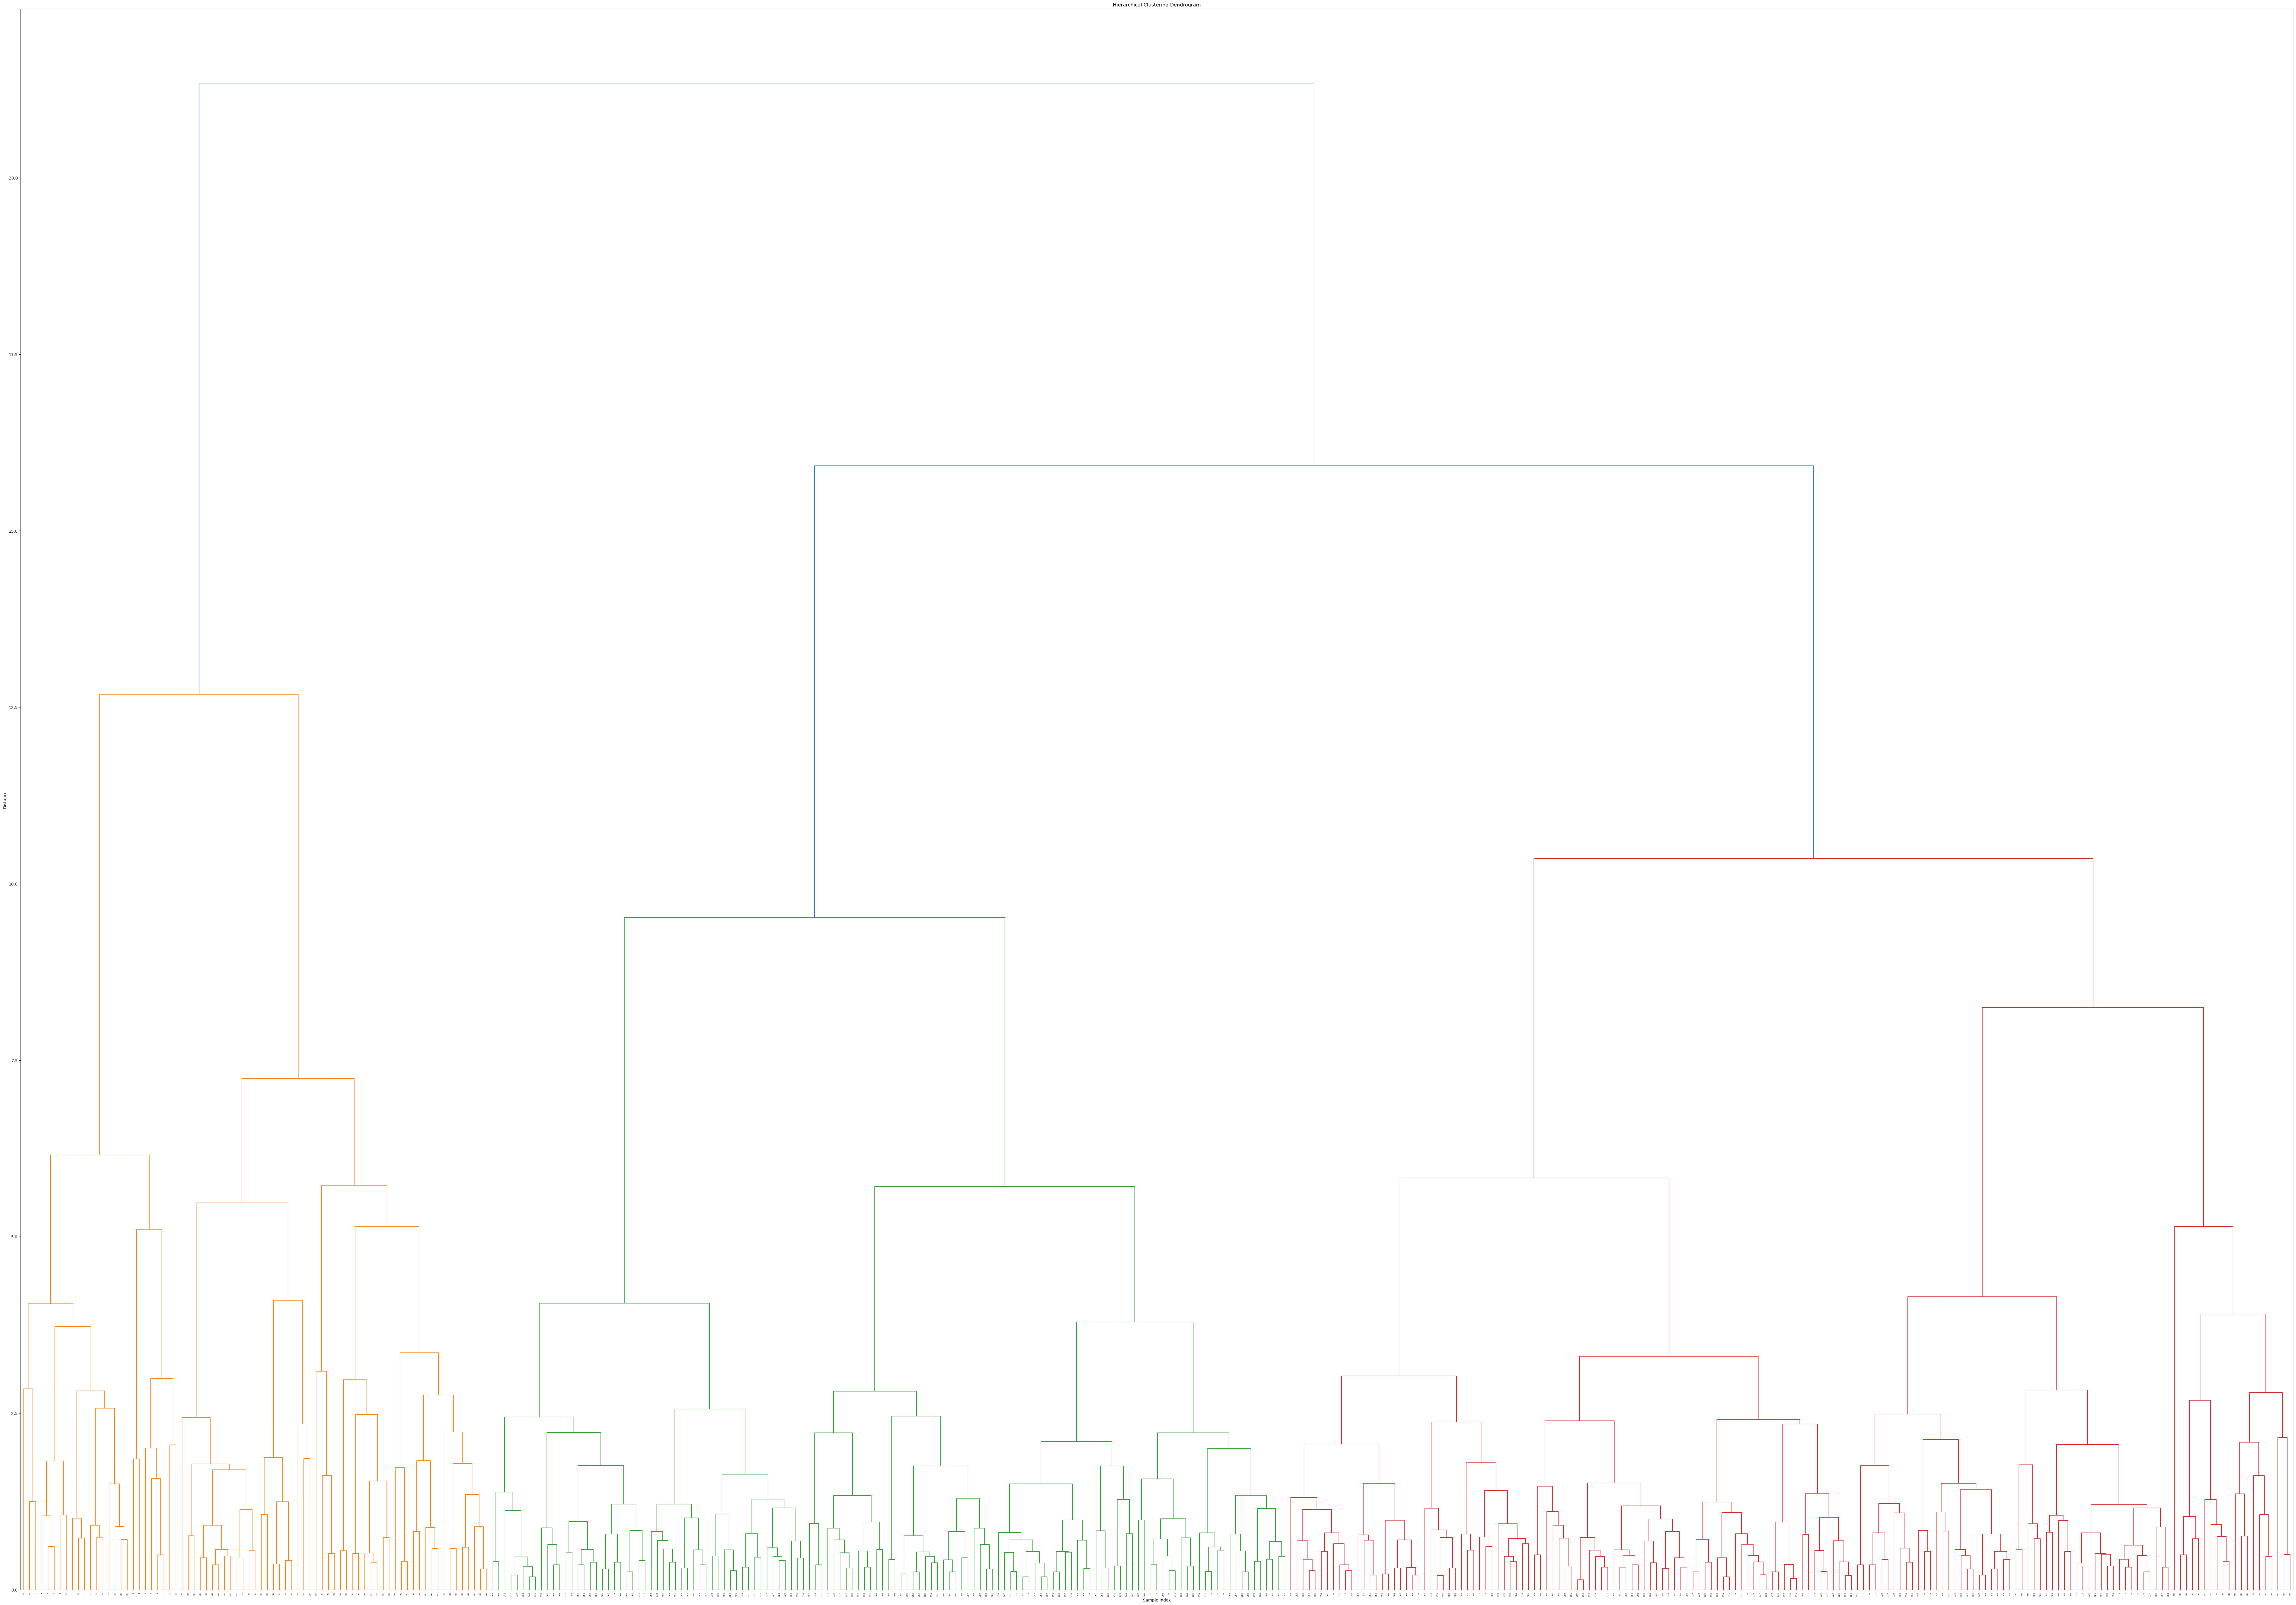

In [6]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform



linkage_data = linkage(data, method='average', metric='euclidean')


plt.figure(figsize=(100, 70))
dendrogram(linkage_data)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


### σ (sigmia) محاسبه ی مقدار
در این مرحله مقدار سیگما که طبق شرح پروژه گفته شده بود برابر مربع متوسط
فاصله در مجموعه داده باشد نسبت به دیتاست داده شده پیدا میکنیم و برابر سیگما قرار میدهیم.

In [7]:
def calculate_sigma(data):
    n = len(data)
    total_distance = 0
    for i in range(n):
        for j in range(i + 1, n):
            total_distance += np.linalg.norm(data[i] - data[j]) ** 2
    sigma = total_distance / (n * (n - 1) / 2)
    return sigma

sigma = calculate_sigma(data)
print(f"Sigma: {sigma}")


Sigma: 281.4398386376056


### تعریف تابع هزینه ی داسگوپتا
+ جای گذاری مقدار محاسبه شده ی سیگما 

In [8]:
def similarity(x, y, sigma=281):
    return np.exp(-np.linalg.norm(x - y) ** 2 / (2 * sigma ** 2))

def dasgupta_cost(data, merge_steps, sigma=281):
    n = len(data)
    W = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            W[i, j] = similarity(data[i], data[j], sigma=281)
    
    cost = 0
    clusters = [{i} for i in range(n)]
    for step in merge_steps:
        c1, c2, dist = step
        c1_indices = c1
        c2_indices = c2
        new_cluster = c1_indices.union(c2_indices)
        for i in c1_indices:
            for j in c2_indices:
                cost += dist * W[i, j] * len(new_cluster)
        clusters = [c for c in clusters if c != c1_indices and c != c2_indices] + [new_cluster]
    return cost


### محاسبه ی هزینه ی درخت دو دویی دندوگرام ساخته شده با روش سینگل لینک با تابع داسگوپتایی که تعریف کردیم
در این بخش ما برای رفع ارور های از نوع تایپ ارور که به آن بر میخوردیم مجبور به ایجاد تغییرات جزئی در تابع خوشه بندی سلسله مراتبی مان شدیم تا به جای خروجی هایی از جنس مختصات نقاط ، شماره (عنوان ، اندیس) نقاط را به ما برگرداند لذا در خروجی کد زیر دوباره شاهد مراحل خوشه بندی به فرم خام این بار با اندیس نقاط و در پایان مراحل شاهد مقدار هزینه ی محاسبه شده توسط تابع هزینه ی داسگوپتایمان هستیم.

In [ ]:
import numpy as np
import pandas as pd

def similarity(x, y, sigma=281):
    return np.exp(-np.linalg.norm(x - y) ** 2 / (2 * sigma ** 2))

def average_link(C, C_prime):
    return np.mean([np.linalg.norm(x - y) for x in C for y in C_prime])

def hierarchical_clustering(data, distance_func):
    clusters = [{i} for i in range(len(data))]
    merge_steps = []
    while len(clusters) > 1:
        min_distance = float('inf')
        clusters_to_merge = (0, 0)
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                distance = distance_func([data[list(clusters[i])[0]]], [data[list(clusters[j])[0]]])
                if distance < min_distance:
                    min_distance = distance
                    clusters_to_merge = (i, j)
        i, j = clusters_to_merge
        merge_steps.append((clusters[i], clusters[j], min_distance))
        new_cluster = clusters[i].union(clusters[j])
        clusters = [clusters[k] for k in range(len(clusters)) if k not in clusters_to_merge] + [new_cluster]
        print(f"{clusters}\n")
    return merge_steps

def dasgupta_cost(data, merge_steps, sigma=281):
    n = len(data)
    W = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            W[i, j] = similarity(data[i], data[j], sigma=281)
    
    cost = 0
    clusters = [{i} for i in range(n)]
    for step in merge_steps:
        c1, c2, dist = step
        c1_indices = c1
        c2_indices = c2
        new_cluster = c1_indices.union(c2_indices)
        for i in c1_indices:
            for j in c2_indices:
                cost += dist * W[i, j] * len(new_cluster)
        clusters = [c for c in clusters if c != c1_indices and c != c2_indices] + [new_cluster]
    return cost

file_path = 'jain-data.txt'  
data_frame = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['x', 'y'])

data = data_frame[['x', 'y']].values

merge_steps_average = hierarchical_clustering(data, average_link)

cost = dasgupta_cost(data, merge_steps_average)
print("Dasgupta Cost:", cost)
